In [2]:
#Clicking on the Cell tab will reveal a Run All button. Use this to initiate the model.


from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [3]:
dftrain = pd.read_csv('water_train.csv') # training data
dfeval = pd.read_csv('water_test.csv') # testing data
y_train = dftrain.pop('Potability') # pops the 'Potability' column from the training data
y_eval = dfeval.pop('Potability') # pops the 'Potability' column from the testing data
print(y_train) # Prints the new training data
print(y_eval) # Prints the new testing data

0       0
1       0
2       0
3       0
4       0
       ..
3018    0
3019    0
3020    0
3021    0
3022    0
Name: Potability, Length: 3023, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
248    1
249    1
250    1
251    1
252    1
Name: Potability, Length: 253, dtype: int64


In [4]:
dftrain.fillna(0, inplace=True) 
dfeval.fillna(0, inplace=True)  # this is used to replace the NaN(Not a number) values involved the the test/train data.

In [5]:
dftrain.head() #the first few columns of the dataframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [6]:
dftrain.describe()  #describes the statistical information of the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000,3023.000000
mean,5.988550,196.500225,21955.692031,7.122982,255.100646,426.479242,14.286525,63.175461,3.968530
std,2.933202,32.617526,8634.589330,1.614281,146.293207,80.854368,3.318439,21.361259,0.781373
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.492207
25%,5.256161,176.954553,15660.013307,6.106666,244.185701,365.840311,12.052522,53.916933,3.439682
50%,6.731278,197.102725,20868.627979,7.135497,318.689010,422.067701,14.213799,65.655326,3.955917
75%,7.833976,216.634730,27177.046229,8.144578,350.581148,481.928903,16.558203,76.796275,4.502900
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [7]:
dftrain.shape # The shape of the dataframe. This one being the training dataset.

(3023, 9)

<AxesSubplot:>

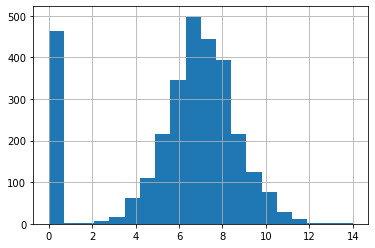

In [8]:
dftrain.ph.hist(bins=20) # A histogram showing the distribution of ph values of the samples.

In [9]:
NUMERIC_COLUMNS = ["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]
feature_columns = []
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


In [10]:
print(feature_columns)

[NumericColumn(key='ph', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Hardness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Solids', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Chloramines', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Sulfate', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Conductivity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Organic_carbon', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Trihalomethanes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Turbidity', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [11]:
def make_input_fn(data_df, label_df, num_epochs=250, shuffle=True, batch_size=128):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 128 and repeat process for number of epochs(Here, 250)
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [12]:
linearest= tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s9/31_x52715ws21d_jv1h11snc0000gn/T/tmpg489y152', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
linearest.train(train_input_fn)  # train
result = linearest.evaluate(eval_input_fn)  # get model metrics/stats by testing on testing data

clear_output()  # clears console output
print(result['accuracy'] * 100, "%")  # gives the percentage accuracy of the model

54.54545617103577 %


In [14]:
print(result) # the result variable is simply a dict of stats about our model

{'accuracy': 0.54545456, 'accuracy_baseline': 0.6284585, 'auc': 0.46845308, 'auc_precision_recall': 0.615621, 'average_loss': 1.7628375, 'label/mean': 0.6284585, 'loss': 1.7482375, 'precision': 0.61, 'prediction/mean': 0.7802724, 'recall': 0.7672956, 'global_step': 6000}


In [15]:
reslt = list(linearest.predict(eval_input_fn)) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s9/31_x52715ws21d_jv1h11snc0000gn/T/tmpg489y152/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [16]:
#Now run this block after inputting a value in the previous block.
def result(num):
    print("The predicted potability of the sample is :")
    print(reslt[num]["probabilities"][1] * 100, "%")

    print("The data assosciated with the sample : ")

    print(dfeval.loc[num])

    print("The actual potability(0(Which means the sample is unsuitable for drinking or 1(The sample is suitable for drinking)): ")
    print(y_eval.loc[num])

x = int(input("Enter the code value of the sample : "))  # You can interact with the model here
result(x)

Enter the code value of the sample : 120
The predicted potability of the sample is :
99.92074370384216 %
The data assosciated with the sample : 
ph                     6.332387
Hardness             186.838028
Solids             23073.063966
Chloramines            8.082004
Sulfate              326.980476
Conductivity         233.907965
Organic_carbon         9.641442
Trihalomethanes       60.940028
Turbidity              5.159002
Name: 120, dtype: float64
The actual potability(0(Which means the sample is unsuitable for drinking or 1(The sample is suitable for drinking)): 
1


In [17]:
# The model may show inaccurate values as it is still in its early stages